# Detección de Objetos con OpenCV

En este notebook usaremos el paquete OpenCV para detectar objetos en movimiento.

In [1]:
# imports

import cv2
import numpy as np
import time
import os
import matplotlib.pyplot as plt

In [2]:
# Versiones de los paquetes usados en el notebook
%reload_ext watermark
%watermark -a "César S. Hooper" --iversions

Author: César S. Hooper

numpy     : 1.19.5
matplotlib: 3.3.4
cv2       : 4.5.3



## Funciones

Previamente, crearemos algunas funciones que nos serán de gran utildad dentro de poco.
Estas funciones nos aydarán a encontrar los bordes de las imágenes, las coordenadas de sus centros, nos permitirán dibujar un rectángulo alrededor de la imagen y también guardar las coordenadas del centro con el propósito de mostar la trayectoria de los objetos.

Usamos la función findContours -incluida en el paquete OpenCV- para encontrar los bordes de la imagen. 
Esto se hace llamando la función 

* **cv2.findContours(imagen, modo, metodo)**

En imagen ingresamos la máscara de la imagen original, el modo RETR_EXTERNAL 
que entrega la parte exterior del borde, y en método usamos CHAIN_APPROX_SIMPLE que sólo deja los puntos extremos de un segmento. Por ejemplo, un rectángulo se representaría sólo por cuatro puntos de sus vértices.

Con la función **cv2.boundingRect(contornos)** encontramos las coordenadas de los centros de esos contornos y con la función **cv2.rectangle(image, coordenadas, radio, espesor)** dibujamos un rectángulo alrededor de la imagen.

In [2]:
def find_object(im, mask, color):
    # calcula los contornos de las imágenes
    
    
    cnts, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    c = max(cnts, key = cv2.contourArea)
    
    # colocamos un rectángulo sobre el objeto
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(im, (x, y), (x+w, y+h), color, 2)
    
    return (round(x+w/2), round(y+h/2))

Con la siguiente función guardamos las 9 ultimas coordenadas de los centros de cada objeto, para poder dibujar la trayctoria en el espacio. 

In [3]:
def append(path, p):
    if len(path)>9:
        path.pop(0)
        
    path.append(p)

Finalmente, vamos a dibujar una circunferencia alrededor de los objetos. Ésto se realiza entregando la posición de los centros y usando la función **cv2.circle(imagen, coordenada_centro, radio, color, ancho_linea)**

In [4]:
def draw_path(im, path, color):
    for p in path:
        cv2.circle(im, p, 10, color, 3)

Vamos a realizar una inspección previa para demostrar cómo funcionan estas funciones.
Primero, separaremos los frames del video. 

In [5]:
# Abre los frames del video y separa los fotogramas
# los guarda como archivos frame_#.jpg
cap = cv2.VideoCapture('C:/Users/Cesar Hooper/Desktop/github/bolas/bolas_GB.mp4')
i=0
while (cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('frame_'+str(i)+'.jpg',frame)
    i+=1
    

cap.release()
cv2.destroyAllWindows()

In [7]:
frames = [k for k in os.listdir('C:/Users/Cesar Hooper/Desktop/github') if k[-3:]=='jpg']
len(frames)

622

Son 622 imágenes las que conforman el video, guardadas en formato jpg. 
Tomaremos una de estas imágenes para mostrar el proceso de detección de las bolas verde y azul.

Luego, tomaremos el video completo detectaremos el movimiento de las imágenes.

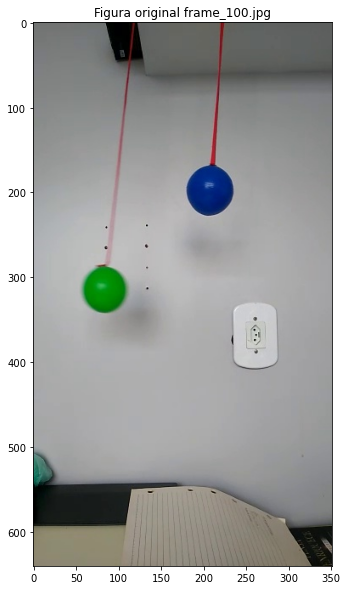

In [8]:
# cargamos imagen
frame = cv2.imread('frame_100.jpg')
plt.figure(figsize=(10,10))
plt.imshow(frame[:,:,::-1])  # para evitar que plt.inshow() distorsione los colores de la imagen. 
plt.title('Figura original frame_100.jpg')
plt.show()
#cv2.imshow('imagen',frame)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


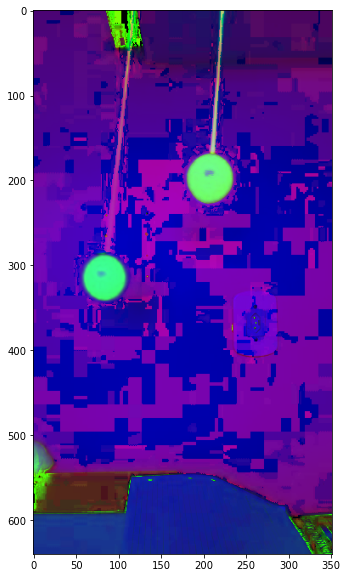

In [9]:
# Pasamos de BGR a HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(10,10))
plt.imshow(hsv)
plt.show()

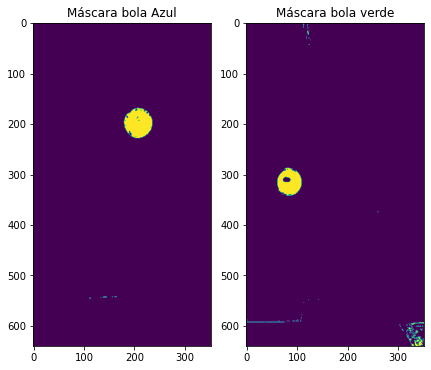

In [10]:
# montamos la máscara en cada objeto. Para ello necesitamos los rangos para los colores verde
# y azul en el espacio HSV

# azul en HSV
hsv_blue_min= (110,50,50)
hsv_blue_max = (130,255,255)

# verde en HSV
hsv_green_min = (29, 86, 6)
hsv_green_max = (64, 255, 255)

# con el siguiente comando filtramos los colores dentro del rango, máximo y mínimo, que se especifica
mask_blue = cv2.inRange(hsv, hsv_blue_min, hsv_blue_max)
mask_green = cv2.inRange(hsv, hsv_green_min, hsv_green_max)

# la función cv2.inRange() enmascara las bolas verde y azul por separado.
# todo lo que no sea verde o azul desaparece de las máscaras

# gráfico de las figuras
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.imshow(mask_blue)
plt.title('Máscara bola Azul')
plt.subplot(1,2,2)
plt.imshow(mask_green)
plt.title('Máscara bola verde')
plt.show()

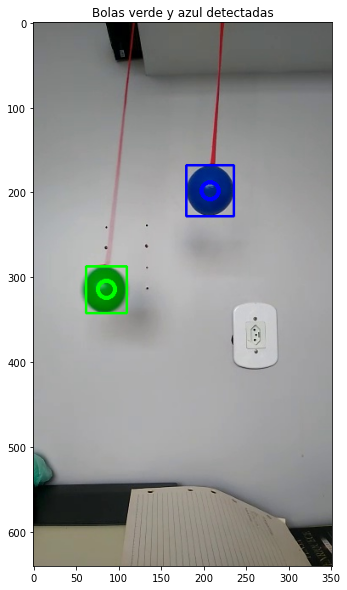

In [11]:
# localizamos el centro de los objetos
pb = find_object(frame, mask_blue, (255,0, 0))
pg = find_object(frame, mask_green, (0, 255, 0))

# aplicamos a función draw_path para dibujar un rectángulo alrededor de cada centro
cv2.circle(frame, pb, 10, (255,0,0), 3)
cv2.circle(frame, pg, 10, (0,255,0), 3)
# gráfico de las figuras

plt.figure(figsize=(10,10))
plt.imshow(frame[:,:,::-1])
plt.title('Bolas verde y azul detectadas')
plt.show()

Y ahora la rutina para detectar las imágenes. Coloca dos objetos azul y verde frente a la cámara de tu pantalla
y prueba cómo este programa detecta las imágenes. 

In [13]:
# listas para guardar la posición de cada objeto
blue_path = []
green_path = []

# azul en HSV
hsv_blue_min= (110,50,50)
hsv_blue_max = (130,255,255)

# verde en HSV
hsv_green_min = (29, 86, 6)
hsv_green_max = (64, 255, 255)

cap = cv2.VideoCapture('C:/Users/Cesar Hooper/Desktop/github/bolas/bolas_GB.mp4')

# para hacer una cáptura directo de la cámara sólo se necesita usar este comando
#cap = cv2.VideoCapture(0)
k = 1
while (cap.isOpened()):
    
    ret, im = cap.read()
    
    if ret == False:
        print('algo no funciona')
    hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    
    mask_blue = cv2.inRange(hsv, hsv_blue_min, hsv_blue_max)
    mask_green = cv2.inRange(hsv, hsv_green_min, hsv_green_max)
    
    
    pb = find_object(im, mask_blue, (255,0, 0))
    pg = find_object(im, mask_green, (0, 255, 0))
   
    
    # aplicando función append
    append(blue_path, pb)
    append(green_path, pg)
    k += 1
    
    # aplicando función draw_path
    draw_path(im, blue_path, (255,0,0))
    draw_path(im, green_path, (0,255,0))
     
    cv2.imshow('image', im)
    if k == 622:
        break
    #if cv2.waitKey(1) & 0xFF == 27:
        #break
    time.sleep(0.01)
